In [87]:
import numpy as np
import pandas as pd
file_path = 'F:/PIV_export/No_Heating/center_blockage_0.7/up/window_96_48_24_step_24/tecplot/include_derivatives/PIVlab_0001.dat'
# skip_header, The number of lines to skip at the beginning of the file.
# skip_footer, The number of lines to skip at the end of the file.
# return, numpy.void
data_np = np.genfromtxt(fname=file_path,
                     skip_header=6,
                     skip_footer=-1,
                     names=["x", "y", "u", "v", "isNaN", "vorticity", "magnitude", "divergence", "dcev", "simple_shear", "simple_strain", "vector_direction"],
                     dtype=np.float32,
                     delimiter=' ')
data_np = np.array(data_np.tolist(), dtype=np.float32)
data_np.shape
# 2378 = 82 X 29

(2378, 12)

In [88]:
data_np_sel = np.take(data_np, indices=[2,3,11], axis=1)

for i in range(data_np_sel.shape[0]):
    if data_np_sel[i,2] < 0:
        data_np_sel[i,2] += 360
data_np_sel = np.abs(data_np_sel)
# data, ["u", "v", "vector_direction"]
data = np.zeros((82, 29, 3), dtype=np.float32)
for c in range(3):
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            data[data.shape[0]-y-1, x, c] = data_np_sel[y * data.shape[1] + x, c]
data[:,:, 1]

array([[0.4045403 , 0.37342653, 0.40173614, ..., 0.8486894 , 0.72657645,
        0.68994075],
       [0.43565407, 0.4146334 , 0.41120985, ..., 0.56833655, 0.64109915,
        0.6533051 ],
       [0.42069677, 0.4382431 , 0.41716477, ..., 0.57567465, 0.6161786 ,
        0.62887543],
       ...,
       [0.10208286, 0.12152071, 0.17642173, ..., 0.9680039 , 0.93416846,
        0.9171531 ],
       [0.11373407, 0.12268235, 0.1363347 , ..., 1.0955328 , 1.0294454 ,
        0.9968796 ],
       [0.116437  , 0.11913992, 0.11830042, ..., 1.240279  , 1.0912008 ,
        1.0440402 ]], dtype=float32)

In [89]:
data_fill = np.zeros((84, 32, 3), dtype=np.float32)

for c in range(3):
    data_fill[1:83, 1:30, c:c+1] = data[:, :, c:c+1]
data_fill[:,:, 1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4045403 , 0.37342653, ..., 0.68994075, 0.        ,
        0.        ],
       [0.        , 0.43565407, 0.4146334 , ..., 0.6533051 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.11373407, 0.12268235, ..., 0.9968796 , 0.        ,
        0.        ],
       [0.        , 0.116437  , 0.11913992, ..., 1.0440402 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [130]:
data_inter_3D = np.zeros((8, 8, 3), dtype=np.float32)
for c in range(3):
    data_inter_3D[:,:,c:c+1] = data[1:9, 1:9, c:c+1]

data_inter_3D = data_inter_3D * 100
print(data_inter_3D.shape)
data_inter_3D[:,:, 1]

(8, 8, 3)


array([[41.46334 , 41.120987, 41.13051 , 41.072685, 46.37786 , 48.459366,
        44.85414 , 42.83509 ],
       [43.82431 , 41.716476, 40.27115 , 43.921547, 49.662186, 47.312202,
        51.860405, 60.184116],
       [41.468056, 41.64947 , 34.316063, 43.8908  , 49.285934, 31.709375,
        49.43705 , 62.95375 ],
       [41.579132, 47.733833, 40.12714 , 40.64078 , 53.60032 , 49.926422,
        51.224667, 58.649464],
       [37.274696, 38.020184, 34.784855, 35.1732  , 45.75707 , 50.686516,
        46.885727, 44.76112 ],
       [27.409584, 32.287346, 28.575289, 38.428272, 43.56824 , 53.153618,
        40.87062 , 23.957521],
       [29.517857, 35.144337, 37.10112 , 43.499084, 50.943394, 50.740494,
        39.48561 , 49.364124],
       [25.911951, 29.698381, 37.934395, 40.405636, 49.458576, 45.630447,
        41.05668 , 66.0876  ]], dtype=float32)

In [110]:
data_inter_2D = np.array([[64,18,24,28,64,32],
                          [27,43,49,82,16,92],
                          [15,34,68,71,94,62],
                          [70,30,38,60,94,52],
                          [22,28,44,80,60,18],
                          [70,41,20,34,62,80]], dtype=np.float32)
data_inter_2D

array([[64., 18., 24., 28., 64., 32.],
       [27., 43., 49., 82., 16., 92.],
       [15., 34., 68., 71., 94., 62.],
       [70., 30., 38., 60., 94., 52.],
       [22., 28., 44., 80., 60., 18.],
       [70., 41., 20., 34., 62., 80.]], dtype=float32)

In [121]:
import imgproc
data_img = imgproc.image_resize(data_inter_2D, 2)
data_img

array([[72.32617 , 56.80371 , 25.75879 , 13.201904, 19.133057, 21.270508,
        19.614258, 33.269775, 62.23706 , 63.146973, 35.99951 , 22.425781],
       [59.904053, 49.840454, 29.713257, 21.7724  , 26.017883, 30.851135,
        36.272156, 42.828247, 50.51941 , 51.819885, 46.729675, 44.18457 ],
       [35.059814, 35.91394 , 37.622192, 38.91339 , 39.787537, 50.01239 ,
        69.58795 , 61.94519 , 27.084106, 29.16571 , 68.19    , 87.70215 ],
       [18.576416, 24.923828, 37.618652, 46.424866, 51.34247 , 63.2713  ,
        82.211365, 73.13037 , 36.02832 , 37.148376, 76.49054 , 96.16162 ],
       [10.453857, 16.870117, 29.702637, 44.306824, 60.68268 , 70.62787 ,
        74.142395, 76.38379 , 77.35205 , 75.76788 , 71.63129 , 69.56299 ],
       [25.876709, 26.987183, 29.20813 , 39.12555 , 56.73944 , 65.376526,
        65.036804, 75.46387 , 96.657715, 94.129456, 67.87909 , 54.753906],
       [64.84497 , 55.275024, 36.13513 , 30.881042, 39.512756, 47.517273,
        54.894592, 70.370605, 93

In [123]:
import cv2
data_cv2 = cv2.resize(data_inter_2D,dsize=None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
data_cv2

array([[ 73.44357  ,  55.788025 ,  26.63385  ,  11.148331 ,  18.05754  ,
         20.565552 ,  17.37085  ,  34.522995 ,  63.078384 ,  64.1633   ,
         37.146393 ,  21.09552  ],
       [ 59.420242 ,  48.599457 ,  30.714752 ,  21.32695  ,  25.506607 ,
         31.81569  ,  37.13408  ,  44.190094 ,  48.973724 ,  50.5663   ,
         47.837692 ,  46.254578 ],
       [ 36.475815 ,  36.91214  ,  37.592987 ,  38.10768  ,  37.57805  ,
         50.19609  ,  69.84169  ,  59.990814 ,  24.896637 ,  27.390549 ,
         65.4767   ,  88.206604 ],
       [ 15.777695 ,  23.709656 ,  36.60956  ,  48.404373 ,  51.86583  ,
         66.87587  ,  85.587326 ,  73.4715   ,  35.85089  ,  36.935104 ,
         75.544205 ,  98.55618  ],
       [  7.7987823,  15.602844 ,  28.079407 ,  46.73558  ,  60.86116  ,
         73.0081   ,  75.824356 ,  77.14166  ,  75.66583  ,  73.83205  ,
         72.5009   ,  71.678314 ],
       [ 27.425919 ,  27.782135 ,  27.986908 ,  39.51735  ,  55.78972  ,
         65.7762   ,  

In [109]:
data_cv2 = cv2.resize(data_inter_2D,dsize=None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
data_cv2 = cv2.resize(data_cv2,dsize=None,fx=2,fy=2,interpolation=cv2.INTER_AREA)
data_cv2

array([[38.  , 38.  , 45.75, 45.75, 51.  , 51.  ],
       [38.  , 38.  , 45.75, 45.75, 51.  , 51.  ],
       [37.25, 37.25, 59.25, 59.25, 75.5 , 75.5 ],
       [37.25, 37.25, 59.25, 59.25, 75.5 , 75.5 ],
       [40.25, 40.25, 44.5 , 44.5 , 55.  , 55.  ],
       [40.25, 40.25, 44.5 , 44.5 , 55.  , 55.  ]], dtype=float32)

In [137]:
# Bicubic
def base_function(x, a=-0.5):
    # describe the base function sin(x)/x
    Wx = 0
    if np.abs(x)<=1:
        Wx = (a+2)*(np.abs(x)**3) - (a+3)*x**2 + 1
    elif 1<=np.abs(x)<=2:
        Wx = a*(np.abs(x)**3) - 5*a*(np.abs(x)**2) + 8*a*np.abs(x) - 4*a
    return Wx

def padding(img):
    if img.ndim == 2:
        img = img[:, :, None]
    h, w, c = img.shape
    print('图像的尺寸为 {}'.format(img.shape))
    pad_image = np.zeros((h+4, w+4, c))
    pad_image[2:h+2, 2:w+2] = img
    return pad_image

def bicubic(img, sacle, a=-0.5):
    print('Doing bicubic')
    if img.ndim == 2:
        img = img[:, :, None]
    h, w, color = img.shape
    img = padding(img)
    nh = int(h * sacle)
    nw = int(h * sacle)
    color = int(color)
    new_img = np.zeros((nh, nw, color))

    for c in range(color):
        for i in range(nw):
            for j in range(nh):

                px = i/sacle + 2
                py = j/sacle + 2
                px_int = int(px)
                py_int = int(py)
                u = px - px_int
                v = py - py_int

                A = np.matrix([[base_function(u+1, a)], [base_function(u, a)], [base_function(u-1, a)], [base_function(u-2, a)]])
                C = np.matrix([base_function(v+1, a), base_function(v, a), base_function(v-1, a), base_function(v-2, a)])
                B = np.matrix([[img[py_int-1, px_int-1][c], img[py_int-1, px_int][c], img[py_int-1, px_int+1][c], img[py_int-1, px_int+2][c]],
                               [img[py_int, px_int-1][c], img[py_int, px_int][c], img[py_int, px_int+1][c], img[py_int, px_int+2][c]],
                               [img[py_int+1, px_int-1][c], img[py_int+1, px_int][c], img[py_int+1, px_int+1][c], img[py_int+1, px_int+2][c]],
                               [img[py_int+2, px_int-1][c], img[py_int+2, px_int][c], img[py_int+2, px_int+1][c], img[py_int+2, px_int+2][c]]])
                new_img[j, i][c] = np.dot(np.dot(C, B), A)
    return new_img

In [117]:
img = data_inter_2D[:, :, None]
img.shape

(6, 6, 1)

In [153]:
new_img_BICBIC = bicubic(data_inter_3D, sacle=0.2)
# new_img_BICBIC = bicubic(new_img_BICBIC, sacle=0.5)
new_img_BICBIC[:, :, 0]

Doing bicubic
图像的尺寸为 (8, 8, 3)


array([[4.52387571]])

In [156]:
image = np.random.randint(1,50,size=(84,32,3))
new_img_BICBIC_2 = bicubic(image, sacle=2)
new_img_BICBIC_2

TypeError: bicubic() got an unexpected keyword argument 'sacle'

In [126]:
new_img_BICBIC[:, 2:-2, 0]

array([[ 18.        ,  17.875     ,  24.        ,  24.125     ,
         28.        ,  48.25      ,  64.        ,  52.25      ],
       [ 32.1875    ,  32.08203125,  36.8125    ,  48.55859375,
         57.4375    ,  47.8984375 ,  39.125     ,  55.47265625],
       [ 43.        ,  44.9375    ,  49.        ,  70.        ,
         82.        ,  46.3125    ,  16.        ,  55.625     ],
       [ 40.3125    ,  51.52734375,  61.9375    ,  74.38671875,
         80.5625    ,  65.609375  ,  52.        ,  69.98828125],
       [ 34.        ,  52.        ,  68.        ,  70.1875    ,
         71.        ,  84.6875    ,  94.        ,  83.3125    ],
       [ 31.5625    ,  41.25390625,  53.8125    ,  57.73828125,
         63.5625    ,  85.625     , 101.        ,  85.04296875],
       [ 30.        ,  30.125     ,  38.        ,  47.375     ,
         60.        ,  81.        ,  94.        ,  78.375     ],
       [ 27.9375    ,  31.15234375,  40.625     ,  56.90625   ,
         72.1875    ,  79.4023437

In [168]:
import cv2
import numpy as np
import math
import sys, time

# Interpolation kernel
def u(s,a):
    if (abs(s) >=0) & (abs(s) <=1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0

#Paddnig
def padding(img,H,W,C):
    zimg = np.zeros((H+4,W+4,C))
    zimg[2:H+2,2:W+2,:C] = img
    #Pad the first/last two col and row
    zimg[2:H+2,0:2,:C]=img[:,0:1,:C]
    zimg[H+2:H+4,2:W+2,:]=img[H-1:H,:,:]
    zimg[2:H+2,W+2:W+4,:]=img[:,W-1:W,:]
    zimg[0:2,2:W+2,:C]=img[0:1,:,:C]
    #Pad the missing eight points
    zimg[0:2,0:2,:C]=img[0,0,:C]
    zimg[H+2:H+4,0:2,:C]=img[H-1,0,:C]
    zimg[H+2:H+4,W+2:W+4,:C]=img[H-1,W-1,:C]
    zimg[0:2,W+2:W+4,:C]=img[0,W-1,:C]
    return zimg

# https://github.com/yunabe/codelab/blob/master/misc/terminal_progressbar/progress.py
def get_progressbar_str(progress):
    END = 170
    MAX_LEN = 30
    BAR_LEN = int(MAX_LEN * progress)
    return ('Progress:[' + '=' * BAR_LEN +
            ('>' if BAR_LEN < MAX_LEN else '') +
            ' ' * (MAX_LEN - BAR_LEN) +
            '] %.1f%%' % (progress * 100.))

# Bicubic operation
def bicubic(img, ratio, a):
    # Get image size
    if img.ndim == 2:
        img = img[:, :, None]
    H,W,C = img.shape

    img = padding(img,H,W,C)
    # Create new image
    dH = math.floor(H*ratio)
    dW = math.floor(W*ratio)
    dst = np.zeros((dH, dW, 3))

    h = 1/ratio

    # print('Start bicubic interpolation')
    # print('It will take a little while...')
    inc = 0
    for c in range(C):
        for j in range(dH):
            for i in range(dW):
                x, y = i * h + 2 , j * h + 2

                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x

                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                mat_l = np.matrix([[u(x1,a),u(x2,a),u(x3,a),u(x4,a)]])
                mat_m = np.matrix([[img[int(y-y1),int(x-x1),c],img[int(y-y2),int(x-x1),c],img[int(y+y3),int(x-x1),c],img[int(y+y4),int(x-x1),c]],
                                   [img[int(y-y1),int(x-x2),c],img[int(y-y2),int(x-x2),c],img[int(y+y3),int(x-x2),c],img[int(y+y4),int(x-x2),c]],
                                   [img[int(y-y1),int(x+x3),c],img[int(y-y2),int(x+x3),c],img[int(y+y3),int(x+x3),c],img[int(y+y4),int(x+x3),c]],
                                   [img[int(y-y1),int(x+x4),c],img[int(y-y2),int(x+x4),c],img[int(y+y3),int(x+x4),c],img[int(y+y4),int(x+x4),c]]])
                mat_r = np.matrix([[u(y1,a)],[u(y2,a)],[u(y3,a)],[u(y4,a)]])
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m),mat_r)

                # Print progress
                inc = inc + 1
                # sys.stderr.write('\r\033[K' + get_progressbar_str(inc/(C*dH*dW)))
                sys.stderr.flush()
    # sys.stderr.write('\n')
    sys.stderr.flush()
    return dst

# Read image
# img = cv2.imread('butterfly.png')

# Scale factor
# ratio = 2
# Coefficient
# a = -1/2


# cv2.imwrite('bicubic_butterfly.png', dst)

In [166]:
img = np.random.randint(1,50,size=(12,16,3))
img[:,:,1]

array([[22, 23, 19,  4, 22, 43, 16,  4, 48, 11, 37, 21, 35, 45,  2, 28],
       [32, 27, 48, 48,  8, 11,  8, 21, 30, 18, 18, 40, 44, 41, 13, 20],
       [ 6, 44,  8, 19, 30, 11, 22, 13, 21, 43, 36, 34, 44, 12,  4,  7],
       [ 7, 43, 26, 38, 13, 44, 46, 14,  2, 12, 34,  6, 15, 27,  2, 45],
       [41, 23, 15, 34, 30, 29, 11, 21, 28,  9, 49, 44, 34, 40,  6, 29],
       [47, 19, 17, 33,  7, 12,  4, 16, 15, 21,  8, 43, 31, 11,  2, 41],
       [18, 20, 48, 49, 17, 49, 47, 16, 15, 48, 35, 24,  2, 10, 16, 20],
       [48, 30, 27, 24, 31, 16, 27,  4, 21, 27, 15, 49, 22, 35,  2, 45],
       [30, 13, 40, 21, 16, 31, 48,  4, 49, 40, 40,  8,  5, 22, 44, 30],
       [23, 42, 11, 17, 19, 29, 21, 25, 14,  8,  4, 39, 16, 40, 23, 49],
       [18,  7,  1,  4, 26,  2, 43, 23,  3, 10, 21, 30, 34, 34, 49,  4],
       [ 9, 11, 26,  5, 25, 13, 22, 34,  3, 10, 45, 10,  6, 40, 23, 25]])

In [169]:
dst = bicubic(img, ratio=2, a=-0.5)
print('Completed!')
dst[:,:,1]

Completed!


array([[22.        , 22.75      , 23.        , 22.        , 19.        ,
        10.125     ,  4.        , 10.75      , 22.        , 35.3125    ,
        43.        , 31.5625    , 16.        ,  5.5625    ,  4.        ,
        27.5625    , 48.        , 30.625     , 11.        , 22.6875    ,
        37.        , 29.75      , 21.        , 26.375     , 35.        ,
        43.5625    , 45.        , 22.5       ,  2.        , 12.3125    ,
        28.        , 29.625     ],
       [28.625     , 25.52734375, 23.9375    , 30.1875    , 36.        ,
        33.546875  , 27.8125    , 19.37109375, 13.625     , 20.41796875,
        27.        , 19.78125   , 11.125     ,  9.41015625, 13.        ,
        28.0625    , 39.5625    , 27.0703125 , 12.9375    , 17.7109375 ,
        26.375     , 28.92578125, 30.875     , 35.13671875, 39.5       ,
        44.9921875 , 44.8125    , 25.72265625,  8.0625    , 14.140625  ,
        24.8125    , 25.859375  ],
       [32.        , 28.1875    , 27.        , 37.1875

In [86]:

from PIL import Image
img = data_inter_3D.resize((16, 16),Image.ANTIALIAS)
img

TypeError: 'tuple' object cannot be interpreted as an integer

In [57]:
from scipy import interpolate
x = np.arange(-3, 3, 1)
y = np.arange(-3, 3, 1)
xx, yy = np.meshgrid(x, y)
z = data_inter_2D
f = interpolate.interp2d(x, y, z, kind='cubic')

xnew = np.arange(-7, 5, 1)
ynew = np.arange(-7, 5, 1)
znew1 = f(xnew, ynew)

xnew = np.arange(-1, 11, 1)
ynew = np.arange(-1, 11, 1)
znew2 = f(xnew, ynew)

znew1 == znew2


array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True,  True

In [92]:
import os
# folder_path = 'F:/PIV export/No Heating/center blockage 0.7/up/window 64 32 step 32/tecplot file/include derivatives'
folder_path = 'F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data'
dat_file_names = os.listdir(folder_path)
# os.path.splitext()将文件名和扩展名分开
# .split根据分隔符将文件名分开
# sorted 方法返回的是一个新的 list

dat_file_names_sorted = sorted(dat_file_names, key=lambda name: int(os.path.splitext(name.split('_')[1])[0]), reverse = False)
print(int(len(dat_file_names_sorted)))
for dat_file_name in dat_file_names_sorted:
    # print(dat_file_name)
    file_path = folder_path + '/' + dat_file_name
    print(file_path)


8179
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00001.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00002.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00003.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00004.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00005.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00006.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00007.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00008.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00009.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00010.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_

In [93]:
from natsort import natsorted
_file_names = natsorted(os.listdir(folder_path))
for _file_name in _file_names:
    # print(dat_file_name)
    _file_path = folder_path + '/' + _file_name
    print(_file_path)

F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00001.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00002.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00003.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00004.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00005.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00006.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00007.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00008.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00009.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/PIV_00010.npy
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/mo

In [1]:
lr_image_path = 'F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_data/No_Heating_center_blockage_0.7_middle_window_96_48_24_0001.dat'
lr_image_path = lr_image_path.replace("24", "240")
lr_image_path

'F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_240/model_data/No_Heating_center_blockage_0.7_middle_window_96_48_240_0001.dat'

In [2]:
import os
# folder_path = 'F:/PIV export/No Heating/center blockage 0.7/up/window 64 32 step 32/tecplot file/include derivatives'
folder_path_ = 'F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test'
dat_file_names = os.listdir(folder_path_)
# os.path.splitext()将文件名和扩展名分开
# .split根据分隔符将文件名分开
# sorted 方法返回的是一个新的 list

dat_file_names_sorted = sorted(dat_file_names, key=lambda name: int(os.path.splitext(name.split('_')[1])[0]), reverse = False)
print(int(len(dat_file_names_sorted)))
for dat_file_name in dat_file_names_sorted:
    # print(dat_file_name)
    file_path = folder_path_ + '/' + dat_file_name
    print(file_path)
    NUM = os.path.splitext(dat_file_name.split('_')[1])[0]
    print(NUM)


817
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00020.npy
00020
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00045.npy
00045
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00052.npy
00052
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00061.npy
00061
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00062.npy
00062
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00067.npy
00067
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00078.npy
00078
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00079.npy
00079
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00103.npy
00103
F:/PIV_export/No_Heating/center_blockage_0.7/middle/window_96_48_24/model_test/PIV_00105.npy
00105
F:/PIV

In [14]:
x = 'PIVlab_0007.dat'
# os.path.splitext分离文件名与扩展名；默认返回(fname,fextension)元组
os.path.splitext(x.split('_')[1])[0]

'0007'

In [16]:
x = 'PIVlab_0007.dat'
x.split('_')

['PIVlab', '0007.dat']

In [26]:
import numpy as np
image = np.random.randint(1,5,size=(8,5,3))
image_max = np.max(image, axis=(0,1))
print(image_max)
max_value = np.max(image, axis=-1)
# print(max_value)

[4 4 4]


In [27]:
# 将三维numpy数组image沿着axis=(0,1)维度与image_max相乘
image_F = image * image_max
print(image_F)

[[[ 8 16 12]
  [16 16 12]
  [ 8  4  8]
  [12 12 12]
  [ 4  4  8]]

 [[16 16 12]
  [16  8  8]
  [ 8 16 16]
  [16 16 12]
  [12 16  8]]

 [[16  8  4]
  [ 8 12  4]
  [12  4  8]
  [ 4  8 16]
  [ 8 16  8]]

 [[ 8  8  4]
  [12 16  4]
  [16  4 12]
  [16 12 16]
  [12 16  8]]

 [[ 4 16 16]
  [ 8 12 16]
  [16  8  8]
  [16 16 12]
  [ 8 12  4]]

 [[12  8  4]
  [ 8  8  8]
  [12  4  4]
  [ 4 12 12]
  [16  4  8]]

 [[12  4 16]
  [ 4 12 12]
  [ 8 12  4]
  [ 4  4  4]
  [12  8 12]]

 [[ 8  4  4]
  [16  4 12]
  [12 12  4]
  [12  8 12]
  [ 8  8 12]]]


In [21]:
# numpy数组升维
image_12 = np.expand_dims(image_max, axis=1)
print(image)
# image_12与image对应维度分别单独相乘
image_ = image * image_max
print(image_)

[[19]
 [19]
 [19]]
[[361 361 361]
 [361 361 361]
 [361 361 361]]


In [54]:
image_min = np.min(image, axis=(0, 1))
image -= image_min
image = image/(image_max - image_min)
image[:,:,0]

array([[0.94444444, 0.33333333, 0.11111111, 0.44444444, 0.77777778,
        0.11111111, 0.16666667, 0.        , 0.16666667, 0.61111111,
        0.88888889, 0.88888889, 0.38888889, 0.5       , 0.05555556,
        0.44444444, 0.72222222, 0.77777778, 0.55555556, 0.77777778,
        0.61111111, 0.38888889, 0.        , 0.44444444],
       [0.83333333, 0.72222222, 0.22222222, 0.94444444, 0.27777778,
        0.66666667, 0.83333333, 0.11111111, 0.44444444, 0.11111111,
        0.16666667, 0.77777778, 0.33333333, 0.94444444, 0.72222222,
        0.77777778, 0.55555556, 0.27777778, 0.22222222, 0.83333333,
        0.27777778, 0.88888889, 0.88888889, 0.94444444],
       [1.        , 0.77777778, 0.66666667, 0.55555556, 0.27777778,
        0.5       , 0.        , 0.72222222, 0.05555556, 0.66666667,
        1.        , 0.05555556, 0.5       , 0.38888889, 0.22222222,
        0.05555556, 0.66666667, 0.94444444, 0.16666667, 0.61111111,
        0.94444444, 0.55555556, 0.        , 0.16666667],
       [0.555

In [9]:
import torch
import numpy as np

np.random.seed(928)
# 随机生成一个三维numpy数组[5,6,3]
Random_array = np.random.randint(1,50,size=(5,4,3))
print(Random_array)

[[[36 22 20]
  [29 28 48]
  [ 8 47 39]
  [31  9 18]]

 [[44 41 27]
  [11 18 42]
  [24 12 46]
  [ 2 29 12]]

 [[48 17 41]
  [43 20 11]
  [35 16  4]
  [31 27 40]]

 [[44  6 10]
  [36 11 16]
  [24 15 46]
  [35 27 23]]

 [[36 49 28]
  [ 6 36  5]
  [45 24  5]
  [25  9  1]]]


In [14]:
image = np.dot(Random_array, [24.966, 128.553, 65.481]) + 16.0  # (5, 4)
image

array([[5052.562, 7482.586, 8811.478, 3125.581],
       [8153.164, 5354.782, 5169.946, 4579.741],
       [6084.49 , 4380.889, 3208.582, 6880.117],
       [2540.632, 3376.555, 5555.605, 5866.804],
       [9047.341, 5121.109, 4552.147, 1862.608]])

In [11]:
Random_array_tensor = torch.from_numpy(np.ascontiguousarray(Random_array)).permute(2, 0, 1).float()
print(Random_array_tensor)
Random_array_tensor_RAW = Random_array_tensor.squeeze(0).permute(1, 2, 0)
print(Random_array_tensor_RAW)

tensor([[[36., 29.,  8., 31.],
         [44., 11., 24.,  2.],
         [48., 43., 35., 31.],
         [44., 36., 24., 35.],
         [36.,  6., 45., 25.]],

        [[22., 28., 47.,  9.],
         [41., 18., 12., 29.],
         [17., 20., 16., 27.],
         [ 6., 11., 15., 27.],
         [49., 36., 24.,  9.]],

        [[20., 48., 39., 18.],
         [27., 42., 46., 12.],
         [41., 11.,  4., 40.],
         [10., 16., 46., 23.],
         [28.,  5.,  5.,  1.]]])
tensor([[[36., 22., 20.],
         [29., 28., 48.],
         [ 8., 47., 39.],
         [31.,  9., 18.]],

        [[44., 41., 27.],
         [11., 18., 42.],
         [24., 12., 46.],
         [ 2., 29., 12.]],

        [[48., 17., 41.],
         [43., 20., 11.],
         [35., 16.,  4.],
         [31., 27., 40.]],

        [[44.,  6., 10.],
         [36., 11., 16.],
         [24., 15., 46.],
         [35., 27., 23.]],

        [[36., 49., 28.],
         [ 6., 36.,  5.],
         [45., 24.,  5.],
         [25.,  9.,  1.]]])

In [8]:
Random_array_per = np.zeros((3, Random_array.shape[0], Random_array.shape[1]), dtype=np.float32)
for c in range(3):
    for y in range(Random_array.shape[0]):
        for x in range(Random_array.shape[1]):
            Random_array_per[c, y, x] = Random_array[y, x, c]
print(Random_array_per)

[[[36. 29.  8. 31.]
  [44. 11. 24.  2.]
  [48. 43. 35. 31.]
  [44. 36. 24. 35.]
  [36.  6. 45. 25.]]

 [[22. 28. 47.  9.]
  [41. 18. 12. 29.]
  [17. 20. 16. 27.]
  [ 6. 11. 15. 27.]
  [49. 36. 24.  9.]]

 [[20. 48. 39. 18.]
  [27. 42. 46. 12.]
  [41. 11.  4. 40.]
  [10. 16. 46. 23.]
  [28.  5.  5.  1.]]]


In [7]:

# numpy数组维度按照axis=(2,0,1)的变换
Random_array_3 = np.transpose(Random_array, axes=(2,0,1))
print('转换后的数据为 \n {}'.format(Random_array_3))
print('转换后的维度为 {}'.format(Random_array_3.shape))
Random_array_tensor = torch.from_numpy(Random_array)
Random_array_tensor_3 = Random_array_tensor.permute(2,0,1)
print('torch转换后的张量为 \n {}'.format(Random_array_tensor_3))

Random_array_3_120 = np.transpose(Random_array_3, axes=(1,2,0))
print('转换回的数据为 \n {}'.format(Random_array_3_120))
print('转换回的维度为 {}'.format(Random_array_3_120.shape))
# reshape从开始一点一点变换，不适合
Random_array_3_re = Random_array.reshape((3, 5, 4))
print('reshape后的数据为 \n {}'.format(Random_array_3_re))

转换后的数据为 
 [[[36 29  8 31]
  [44 11 24  2]
  [48 43 35 31]
  [44 36 24 35]
  [36  6 45 25]]

 [[22 28 47  9]
  [41 18 12 29]
  [17 20 16 27]
  [ 6 11 15 27]
  [49 36 24  9]]

 [[20 48 39 18]
  [27 42 46 12]
  [41 11  4 40]
  [10 16 46 23]
  [28  5  5  1]]]
转换后的维度为 (3, 5, 4)
torch转换后的张量为 
 tensor([[[36, 29,  8, 31],
         [44, 11, 24,  2],
         [48, 43, 35, 31],
         [44, 36, 24, 35],
         [36,  6, 45, 25]],

        [[22, 28, 47,  9],
         [41, 18, 12, 29],
         [17, 20, 16, 27],
         [ 6, 11, 15, 27],
         [49, 36, 24,  9]],

        [[20, 48, 39, 18],
         [27, 42, 46, 12],
         [41, 11,  4, 40],
         [10, 16, 46, 23],
         [28,  5,  5,  1]]], dtype=torch.int32)
转换回的数据为 
 [[[36 22 20]
  [29 28 48]
  [ 8 47 39]
  [31  9 18]]

 [[44 41 27]
  [11 18 42]
  [24 12 46]
  [ 2 29 12]]

 [[48 17 41]
  [43 20 11]
  [35 16  4]
  [31 27 40]]

 [[44  6 10]
  [36 11 16]
  [24 15 46]
  [35 27 23]]

 [[36 49 28]
  [ 6 36  5]
  [45 24  5]
  [25  9  1]]]
转

In [40]:
# one_array = np.array([[0.1],[10],[0.01]])
one_array = np.array([1,10000,0.0001])
print(one_array)
print(Random_array * one_array)

[1.e+00 1.e+04 1.e-04]
[[[1.e+00 2.e+04 2.e-04]
  [3.e+00 1.e+04 2.e-04]]

 [[3.e+00 3.e+04 4.e-04]
  [3.e+00 2.e+04 1.e-04]]

 [[4.e+00 4.e+04 4.e-04]
  [1.e+00 4.e+04 1.e-04]]

 [[2.e+00 3.e+04 2.e-04]
  [4.e+00 2.e+04 3.e-04]]]


In [42]:
Random_array_33 = np.transpose(Random_array + one_array, axes=(2,0,1))
print(Random_array_33)
print(Random_array_33.shape)

[[[2.0000e+00 4.0000e+00]
  [4.0000e+00 4.0000e+00]
  [5.0000e+00 2.0000e+00]
  [3.0000e+00 5.0000e+00]]

 [[1.0002e+04 1.0001e+04]
  [1.0003e+04 1.0002e+04]
  [1.0004e+04 1.0004e+04]
  [1.0003e+04 1.0002e+04]]

 [[2.0001e+00 2.0001e+00]
  [4.0001e+00 1.0001e+00]
  [4.0001e+00 1.0001e+00]
  [2.0001e+00 3.0001e+00]]]
(3, 4, 2)


In [4]:
import cv2
print(cv2.__version__)


4.6.0


In [10]:
import torch
x = torch.randn(3, 24, 32)
y = torch.cat([x, x], 1)
y.shape

torch.Size([3, 48, 32])

In [29]:
# 使用PIL库读取本地图片
from PIL import Image
# 读取图片
img = Image.open('C:/Users/1/Desktop/picture/coffe.jpg')
# 显示图片
img.show()

In [1]:
# 使用opencv库读取本地图片
import cv2
# 读取图片
img = cv2.imread('C:/Users/1/Desktop/picture/coffe.jpg',1)
print(img.shape)


(591, 474, 3)


In [8]:
import numpy as np
import cv2
import os
image_file_names = 'C:/Users/1/Desktop/picture/coffe.jpg'
print(os.path.exists(image_file_names))
gt_image = cv2.imread(image_file_names,1)
print(gt_image.shape)
# 显示opencv库读取的本地图片
cv2.imshow('imshow',gt_image)
cv2.waitKey(0)


True
(591, 474, 3)


-1

In [9]:
image = cv2.cvtColor(gt_image, cv2.COLOR_BGR2RGB)
print(image.shape)
cv2.imshow('imshow',image)
cv2.waitKey(0)

(591, 474, 3)


-1

In [3]:
import numpy as np
import cv2
import os
image_file_names = 'C:/Users/1/Desktop/picture/coffe.jpg'
print(os.path.exists(image_file_names))
gt_image = cv2.imread(image_file_names,cv2.IMREAD_COLOR).astype(np.float32) / 255.
gt_image.shape
cv2.imshow('imshow',gt_image)
cv2.waitKey(0)


True


-1

In [71]:
gt_crop_image = cv2.cvtColor(gt_image, cv2.COLOR_BGR2RGB)
gt_crop_image.shape
cv2.imshow('imshow',gt_crop_image)
cv2.waitKey(0)

-1

In [5]:
import os
a = os.path.join("results", 'LLL', '052', '5.csv')
a

'results\\LLL\\052\\5.csv'

In [5]:
try:

    print('11' / 2)
except:
    s = 5+3
    print('跳过执行')
    print(s)

跳过执行
8


尺寸重新裁剪，上采样复原检验

In [28]:
import cv2
import numpy as np
import math
import sys, time

# Interpolation kernel
def u(s,a):
    if (abs(s) >=0) & (abs(s) <=1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0

#Paddnig
def padding(img,H,W,C):
    zimg = np.zeros((H+4,W+4,C))
    zimg[2:H+2,2:W+2,:C] = img
    #Pad the first/last two col and row
    zimg[2:H+2,0:2,:C]=img[:,0:1,:C]
    zimg[H+2:H+4,2:W+2,:]=img[H-1:H,:,:]
    zimg[2:H+2,W+2:W+4,:]=img[:,W-1:W,:]
    zimg[0:2,2:W+2,:C]=img[0:1,:,:C]
    #Pad the missing eight points
    zimg[0:2,0:2,:C]=img[0,0,:C]
    zimg[H+2:H+4,0:2,:C]=img[H-1,0,:C]
    zimg[H+2:H+4,W+2:W+4,:C]=img[H-1,W-1,:C]
    zimg[0:2,W+2:W+4,:C]=img[0,W-1,:C]
    return zimg

# https://github.com/yunabe/codelab/blob/master/misc/terminal_progressbar/progress.py
def get_progressbar_str(progress):
    END = 170
    MAX_LEN = 30
    BAR_LEN = int(MAX_LEN * progress)
    return ('Progress:[' + '=' * BAR_LEN +
            ('>' if BAR_LEN < MAX_LEN else '') +
            ' ' * (MAX_LEN - BAR_LEN) +
            '] %.1f%%' % (progress * 100.))

# Bicubic operation
def bicubic(img, ratio, a, squeeze_flag=True):
    # Get image size
    if img.ndim == 2:
        img = img[:, :, None]
    H, W, C = img.shape

    img = padding(img, H, W, C)
    # Create new image
    dH = math.floor(H * ratio)
    dW = math.floor(W * ratio)
    dst = np.zeros((dH, dW, 3))

    h = 1 / ratio

    # print('Start bicubic interpolation')
    # print('It will take a little while...')
    inc = 0
    for c in range(C):
        for j in range(dH):
            for i in range(dW):
                x, y = i * h + 2, j * h + 2

                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x

                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                mat_l = np.matrix([[u(x1, a), u(x2, a), u(x3, a), u(x4, a)]])
                mat_m = np.matrix([[img[int(y - y1), int(x - x1), c], img[int(y - y2), int(x - x1), c],
                                    img[int(y + y3), int(x - x1), c], img[int(y + y4), int(x - x1), c]],
                                   [img[int(y - y1), int(x - x2), c], img[int(y - y2), int(x - x2), c],
                                    img[int(y + y3), int(x - x2), c], img[int(y + y4), int(x - x2), c]],
                                   [img[int(y - y1), int(x + x3), c], img[int(y - y2), int(x + x3), c],
                                    img[int(y + y3), int(x + x3), c], img[int(y + y4), int(x + x3), c]],
                                   [img[int(y - y1), int(x + x4), c], img[int(y - y2), int(x + x4), c],
                                    img[int(y + y3), int(x + x4), c], img[int(y + y4), int(x + x4), c]]])
                mat_r = np.matrix([[u(y1, a)], [u(y2, a)], [u(y3, a)], [u(y4, a)]])
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)

                # Print progress
                inc = inc + 1
                # sys.stderr.write('\r\033[K' + get_progressbar_str(inc/(C*dH*dW)))
                sys.stderr.flush()
    # sys.stderr.write('\n')
    sys.stderr.flush()
    if squeeze_flag:
        dst = np.transpose(dst, axes=(2, 0, 1))
    return dst

# Read image
# img = cv2.imread('butterfly.png')

# Scale factor
# ratio = 2
# Coefficient
# a = -1/2


# cv2.imwrite('bicubic_butterfly.png', dst)

In [131]:
import math
import random
from typing import Any

import cv2
import numpy as np
import torch
from numpy import ndarray
from torch import Tensor
# Code reference `https://github.com/xinntao/BasicSR/blob/master/basicsr/utils/matlab_functions.py`
def _cubic(x: Any) -> Any:
    """Implementation of `cubic` function in Matlab under Python language.
    Args:
        x: Element vector.
    Returns:
        Bicubic interpolation
    """
    absx = torch.abs(x)
    absx2 = absx ** 2
    absx3 = absx ** 3
    return (1.5 * absx3 - 2.5 * absx2 + 1) * ((absx <= 1).type_as(absx)) + (
            -0.5 * absx3 + 2.5 * absx2 - 4 * absx + 2) * (
               ((absx > 1) * (absx <= 2)).type_as(absx))


# Code reference `https://github.com/xinntao/BasicSR/blob/master/basicsr/utils/matlab_functions.py`
def _calculate_weights_indices(in_length: int,
                               out_length: int,
                               scale: float,
                               kernel_width: int,
                               antialiasing: bool) -> [np.ndarray, np.ndarray, int, int]:
    """Implementation of `calculate_weights_indices` function in Matlab under Python language.
    Args:
        in_length (int): Input length.
        out_length (int): Output length.
        scale (float): Scale factor.
        kernel_width (int): Kernel width.
        antialiasing (bool): Whether to apply antialiasing when down-sampling operations.
            Caution: Bicubic down-sampling in PIL uses antialiasing by default.
    Returns:
       weights, indices, sym_len_s, sym_len_e
    """
    if (scale < 1) and antialiasing:
        # Use a modified kernel (larger kernel width) to simultaneously
        # interpolate and antialiasing
        kernel_width = kernel_width / scale

    # Output-space coordinates
    x = torch.linspace(1, out_length, out_length)

    # Input-space coordinates. Calculate the inverse mapping such that 0.5
    # in output space maps to 0.5 in input space, and 0.5 + scale in output
    # space maps to 1.5 in input space.
    u = x / scale + 0.5 * (1 - 1 / scale)

    # What is the left-most pixel that can be involved in the computation?
    left = torch.floor(u - kernel_width / 2)

    # What is the maximum number of pixels that can be involved in the
    # computation?  Note: it's OK to use an extra pixel here; if the
    # corresponding weights are all zero, it will be eliminated at the end
    # of this function.
    p = math.ceil(kernel_width) + 2

    # The indices of the input pixels involved in computing the k-th output
    # pixel are in row k of the indices matrix.
    indices = left.view(out_length, 1).expand(out_length, p) + torch.linspace(0, p - 1, p).view(1, p).expand(
        out_length, p)

    # The weights used to compute the k-th output pixel are in row k of the
    # weights matrix.
    distance_to_center = u.view(out_length, 1).expand(out_length, p) - indices

    # apply cubic kernel
    if (scale < 1) and antialiasing:
        weights = scale * _cubic(distance_to_center * scale)
    else:
        weights = _cubic(distance_to_center)

    # Normalize the weights matrix so that each row sums to 1.
    weights_sum = torch.sum(weights, 1).view(out_length, 1)
    weights = weights / weights_sum.expand(out_length, p)

    # If a column in weights is all zero, get rid of it. only consider the
    # first and last column.
    weights_zero_tmp = torch.sum((weights == 0), 0)
    if not math.isclose(weights_zero_tmp[0], 0, rel_tol=1e-6):
        indices = indices.narrow(1, 1, p - 2)
        weights = weights.narrow(1, 1, p - 2)
    if not math.isclose(weights_zero_tmp[-1], 0, rel_tol=1e-6):
        indices = indices.narrow(1, 0, p - 2)
        weights = weights.narrow(1, 0, p - 2)
    weights = weights.contiguous()
    indices = indices.contiguous()
    sym_len_s = -indices.min() + 1
    sym_len_e = indices.max() - in_length
    indices = indices + sym_len_s - 1
    return weights, indices, int(sym_len_s), int(sym_len_e)


def image_to_tensor(image: ndarray, range_norm: bool, half: bool) -> Tensor:
    """Convert the image data type to the Tensor (NCWH) data type supported by PyTorch
    Args:
        image (np.ndarray): The image data read by ``OpenCV.imread``, the data range is [0,255] or [0, 1]
        range_norm (bool): Scale [0, 1] data to between [-1, 1]
        half (bool): Whether to convert torch.float32 similarly to torch.half type
    Returns:
        tensor (Tensor): Data types supported by PyTorch
    Examples:
        >>> example_image = cv2.imread("lr_image.bmp")
        >>> example_tensor = image_to_tensor(example_image, range_norm=True, half=False)
    """
    # Convert image data type to Tensor data type
    tensor = torch.from_numpy(np.ascontiguousarray(image)).permute(2, 0, 1).float()

    # Scale the image data from [0, 1] to [-1, 1]
    if range_norm:
        tensor = tensor.mul(2.0).sub(1.0)

    # Convert torch.float32 image data type to torch.half image data type
    if half:
        tensor = tensor.half()

    return tensor


def tensor_to_image(tensor: Tensor, range_norm: bool, half: bool) -> Any:
    """Convert the Tensor(NCWH) data type supported by PyTorch to the np.ndarray(WHC) image data type
    Args:
        tensor (Tensor): Data types supported by PyTorch (NCHW), the data range is [0, 1]
        range_norm (bool): Scale [-1, 1] data to between [0, 1]
        half (bool): Whether to convert torch.float32 similarly to torch.half type.
    Returns:
        image (np.ndarray): Data types supported by PIL or OpenCV
    Examples:
        >>> example_image = cv2.imread("lr_image.bmp")
        >>> example_tensor = image_to_tensor(example_image, range_norm=False, half=False)
    """
    if range_norm:
        tensor = tensor.add(1.0).div(2.0)
    if half:
        tensor = tensor.half()

    image = tensor.squeeze(0).permute(1, 2, 0).mul(255).clamp(0, 255).cpu().numpy().astype("uint8")

    return image


def preprocess_one_image(image_path: str, device: torch.device) -> Tensor:
    image = cv2.imread(image_path).astype(np.float32) / 255.0

    # BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert image data to pytorch format data
    tensor = image_to_tensor(image, False, False).unsqueeze_(0)

    # Transfer tensor channel image format data to CUDA device
    tensor = tensor.to(device=device, memory_format=torch.channels_last, non_blocking=True)

    return tensor


# Code reference `https://github.com/xinntao/BasicSR/blob/master/basicsr/utils/matlab_functions.py`
def image_resize(image: Any, scale_factor: float, antialiasing: bool = True) -> Any:
    """Implementation of `imresize` function in Matlab under Python language.
    Args:
        image: The input image.
        scale_factor (float): Scale factor. The same scale applies for both height and width.
        antialiasing (bool): Whether to apply antialiasing when down-sampling operations.
            Caution: Bicubic down-sampling in `PIL` uses antialiasing by default. Default: ``True``.
    Returns:
        out_2 (np.ndarray): Output image with shape (c, h, w), [0, 1] range, w/o round
    """
    squeeze_flag = False
    if type(image).__module__ == np.__name__:  # numpy type
        numpy_type = True
        if image.ndim == 2:
            image = image[:, :, None]
            squeeze_flag = True
        image = torch.from_numpy(image.transpose(2, 0, 1)).float()
    else:
        numpy_type = False
        if image.ndim == 2:
            image = image.unsqueeze(0)
            squeeze_flag = True

    in_c, in_h, in_w = image.size()
    out_h, out_w = math.ceil(in_h * scale_factor), math.ceil(in_w * scale_factor)
    kernel_width = 4

    # get weights and indices
    weights_h, indices_h, sym_len_hs, sym_len_he = _calculate_weights_indices(in_h, out_h, scale_factor, kernel_width,
                                                                              antialiasing)
    weights_w, indices_w, sym_len_ws, sym_len_we = _calculate_weights_indices(in_w, out_w, scale_factor, kernel_width,
                                                                              antialiasing)
    # process H dimension
    # symmetric copying
    img_aug = torch.FloatTensor(in_c, in_h + sym_len_hs + sym_len_he, in_w)
    img_aug.narrow(1, sym_len_hs, in_h).copy_(image)

    sym_patch = image[:, :sym_len_hs, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    img_aug.narrow(1, 0, sym_len_hs).copy_(sym_patch_inv)

    sym_patch = image[:, -sym_len_he:, :]
    inv_idx = torch.arange(sym_patch.size(1) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(1, inv_idx)
    img_aug.narrow(1, sym_len_hs + in_h, sym_len_he).copy_(sym_patch_inv)

    out_1 = torch.FloatTensor(in_c, out_h, in_w)
    kernel_width = weights_h.size(1)
    for i in range(out_h):
        idx = int(indices_h[i][0])
        for j in range(in_c):
            out_1[j, i, :] = img_aug[j, idx:idx + kernel_width, :].transpose(0, 1).mv(weights_h[i])

    # process W dimension
    # symmetric copying
    out_1_aug = torch.FloatTensor(in_c, out_h, in_w + sym_len_ws + sym_len_we)
    out_1_aug.narrow(2, sym_len_ws, in_w).copy_(out_1)

    sym_patch = out_1[:, :, :sym_len_ws]
    inv_idx = torch.arange(sym_patch.size(2) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(2, inv_idx)
    out_1_aug.narrow(2, 0, sym_len_ws).copy_(sym_patch_inv)

    sym_patch = out_1[:, :, -sym_len_we:]
    inv_idx = torch.arange(sym_patch.size(2) - 1, -1, -1).long()
    sym_patch_inv = sym_patch.index_select(2, inv_idx)
    out_1_aug.narrow(2, sym_len_ws + in_w, sym_len_we).copy_(sym_patch_inv)

    out_2 = torch.FloatTensor(in_c, out_h, out_w)
    kernel_width = weights_w.size(1)
    for i in range(out_w):
        idx = int(indices_w[i][0])
        for j in range(in_c):
            out_2[j, :, i] = out_1_aug[j, :, idx:idx + kernel_width].mv(weights_w[i])
    print('squeeze_flag是 {}'.format(squeeze_flag))
    if squeeze_flag:
        print('没有执行')
        out_2 = out_2.squeeze(0)
        print(out_2.shape)
    if numpy_type:
        print('执行了::')
        print(out_2.shape)
        out_2 = out_2.numpy()
        if not squeeze_flag:
            out_2 = out_2.transpose(1, 2, 0)
            print('执行了')
            print(out_2.shape)

    return out_2


In [114]:
squeeze_flag_52 = True
if not squeeze_flag_52:
    print(1+1)

In [51]:
import numpy as np
_path = 'F:/PIV_export/No_Heating/center_blockage_0.7/up/window_96_48_24_step_24/model_data/PIV_00011.npy'
data_wall_or = np.load(_path).astype(np.float32)
print(data_wall_or.shape)
data_wall_or[:, :, 1]

(82, 29, 3)


array([[4.3827507e-01, 4.3855599e-01, 3.6476675e-01, ..., 2.4983513e-01,
        3.8942334e-01, 4.3663755e-01],
       [4.3799412e-01, 5.1262617e-01, 3.5675061e-01, ..., 4.9628961e-01,
        4.8179737e-01, 4.8385176e-01],
       [3.6308116e-01, 3.7653574e-01, 3.2233393e-01, ..., 6.3792092e-01,
        5.5762470e-01, 5.3312039e-01],
       ...,
       [3.4216024e-02, 2.5793629e-02, 8.1798155e-03, ..., 1.0094442e+00,
        9.2921364e-01, 8.6745131e-01],
       [1.4030837e-02, 3.2549462e-04, 3.9593637e-02, ..., 1.0777766e+00,
        1.0114882e+00, 9.0287328e-01],
       [7.5509921e-03, 1.0711468e-03, 4.6630464e-03, ..., 1.1189396e+00,
        9.8670274e-01, 8.2968038e-01]], dtype=float32)

In [53]:
CCCCCCC = np.transpose(data_wall_or, axes=(2, 0, 1))
CCCCCCC.shape

(3, 82, 29)

In [32]:
def crop_divide_exactly(data: np.ndarray) -> np.ndarray:

    data_fill = data[1:data.shape[0]-1, 1:, :]



    return data_fill

In [139]:
data_wall = crop_divide_exactly(data_wall_or)
print(data_wall.shape)
data_wall[:, :, 1]

(80, 28, 3)


array([[5.1262617e-01, 3.5675061e-01, 2.2727561e-01, ..., 4.9628961e-01,
        4.8179737e-01, 4.8385176e-01],
       [3.7653574e-01, 3.2233393e-01, 3.4747717e-01, ..., 6.3792092e-01,
        5.5762470e-01, 5.3312039e-01],
       [3.0810171e-01, 2.8232706e-01, 3.6363328e-01, ..., 6.2274808e-01,
        5.7766014e-01, 5.5788469e-01],
       ...,
       [6.0453180e-02, 4.3350823e-02, 4.5387175e-02, ..., 9.2359948e-01,
        8.2847089e-01, 7.7026695e-01],
       [2.5793629e-02, 8.1798155e-03, 7.2104566e-02, ..., 1.0094442e+00,
        9.2921364e-01, 8.6745131e-01],
       [3.2549462e-04, 3.9593637e-02, 7.6604292e-02, ..., 1.0777766e+00,
        1.0114882e+00, 9.0287328e-01]], dtype=float32)

In [138]:
import imgproc
gt_crop_image = imgproc.random_crop(data_wall_or, 80, 28)
print(gt_crop_image.shape)
# gt_crop_image[:, :, 1]

(80, 28, 3)


In [137]:
# 验证image_resize输出的形状
NNNN = image_resize(gt_crop_image, 0.25)
print(NNNN.shape)
# NNNN[:, :, 1]

squeeze_flag是 False
执行了::
torch.Size([3, 20, 7])
执行了
(20, 7, 3)
(20, 7, 3)


In [143]:
data_wall_lr = bicubic(data_wall, ratio=0.25, a=-0.5, squeeze_flag=False)
print(data_wall_lr.shape)
data_wall_lr[:, :, 1]

(20, 7, 3)


array([[0.51262617, 0.26479098, 0.63423312, 0.60932946, 0.57649201,
        0.70315868, 0.615605  ],
       [0.30183318, 0.37971085, 0.56532484, 0.67016613, 0.78308284,
        0.67944479, 0.60096002],
       [0.22489269, 0.51461697, 0.45693225, 0.69197476, 0.70755148,
        0.84696317, 0.28802514],
       [0.46702164, 0.42559385, 0.60186195, 0.81332356, 0.68881112,
        0.65457016, 1.02508855],
       [0.42634669, 0.50509244, 0.62258041, 0.56941032, 0.76717585,
        0.74441314, 0.82155985],
       [0.42266455, 0.30913976, 0.74895465, 0.70187616, 0.82397926,
        0.83439827, 0.53142875],
       [0.53834689, 0.43098548, 0.72898364, 0.47640461, 0.71490419,
        0.7650255 , 0.64471143],
       [0.41537231, 0.59905785, 0.49809986, 0.61391664, 0.92813671,
        0.79652244, 0.69269425],
       [0.46230298, 0.52850425, 0.39837262, 0.64665526, 0.65539616,
        0.774463  , 0.63603139],
       [0.46101463, 0.56349713, 0.73105377, 0.61252254, 0.77086711,
        0.89898384, 0.6

In [142]:
data_restore = np.zeros(data_wall.shape)
for i in range(data_wall_lr.shape[0]):
    for j in range(data_wall_lr.shape[1]):
        for k in range(data_wall_lr.shape[2]):
            data_restore[i*4,j*4,k] = data_wall_lr[i,j,k]
data_restore[:, :, 1]

array([[0.51262617, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
data_wall_hr = bicubic(data_wall_lr, ratio=4, a=-0.5)
print(data_wall_hr.shape)
data_wall_hr[:, :, 1]

(80, 28, 3)


array([[0.51262617, 0.45362585, 0.36561844, ..., 0.60944888, 0.61013289,
        0.61355296],
       [0.47161214, 0.42578361, 0.35717941, ..., 0.61472981, 0.61531146,
        0.6182197 ],
       [0.41203846, 0.38522673, 0.34463298, ..., 0.62411501, 0.62452901,
        0.62659896],
       ...,
       [0.11251518, 0.12009048, 0.13015556, ..., 0.98384221, 0.98482083,
        0.98971393],
       [0.11221845, 0.12001752, 0.13040992, ..., 0.98099609, 0.98199309,
        0.98697808],
       [0.11073483, 0.11965268, 0.13168172, ..., 0.96676547, 0.96785437,
        0.97329886]])

In [58]:
import random
random.seed(928)
random.randint(0, 5)

2

In [61]:
# 三维数据转换为二维数据以方便绘图
import numpy as np
file_Path = 'F:/model_generator/No_Heating/center_blockage_0.7/middle/reconstructedPIV_00001.npy'
data_3D = np.load(file_Path).astype(np.float32)
print(data_3D.shape)  # (236, 116, 3)
data_00 = np.zeros((236*116, 3), dtype=np.float32)
for c in range(3):
    for y in range(data_3D.shape[0]):
        for x in range(data_3D.shape[1]):
            # data[data.shape[0] - y - 1, x, c] = data_3D[y * data.shape[1] + x, c]
            data_00[y * data_3D.shape[1] + x, c] = data_3D[data_3D.shape[0] - y - 1, x, c]
print(data_00.shape)

(236, 116, 3)
(27376, 3)


In [62]:
# 三维numoy数组维度按照axix=(2,0,1)变换
data_3D_Tr = np.transpose(data_3D, axes=(2, 0, 1))
print(data_3D_Tr.shape)
data_11 = np.zeros((236*116, 3), dtype=np.float32)
for c in range(3):
    for y in range(data_3D_Tr.shape[1]):
        for x in range(data_3D_Tr.shape[2]):
            # data[data.shape[0] - y - 1, x, c] = data_3D[y * data.shape[1] + x, c]
            data_11[y * data_3D_Tr.shape[2] + x, c] = data_3D_Tr[c, data_3D_Tr.shape[1] - y - 1, x]
print(data_11.shape)

(3, 236, 116)
(27376, 3)


In [63]:
print(data_00[0:8, 0])
print(data_11[0:8, 0])
print(data_3D[235, 0:8, 0])
print(data_3D_Tr[0, 235, 0:8])

[0.20852026 0.2956682  0.5158946  0.5171849  0.5158794  0.5363137
 0.5481367  0.58559734]
[0.20852026 0.2956682  0.5158946  0.5171849  0.5158794  0.5363137
 0.5481367  0.58559734]
[0.20852026 0.2956682  0.5158946  0.5171849  0.5158794  0.5363137
 0.5481367  0.58559734]
[0.20852026 0.2956682  0.5158946  0.5171849  0.5158794  0.5363137
 0.5481367  0.58559734]


In [65]:
# 三维numpy数组reshape为二维数组
data_re = data_3D.reshape((3, 236, 116))
print(data_re[0, 235, 0:8])

[1.02534134e+02 9.13976654e-02 3.71884048e-01 1.07861847e+02
 8.64807516e-02 3.88472855e-01 1.14456131e+02 8.29523057e-02]


In [70]:
index_array = np.random.randint(0,2,size=(10,3))
print(index_array)
index_array_index = index_array[2:3,0:3]
print(index_array_index)


[[1 0 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 1 1]]
[[1 0 1]]


In [76]:
import numpy as np

# Define the size of the grid and the scale of the axes
grid_size = (236, 116)
scale = 0.001634394904459

# Create an empty numpy array to store the coordinates
coords = np.empty((grid_size[0]*grid_size[1], 2))

# Fill the numpy array with the coordinates of each point
for i in range(grid_size[1]):
    for j in range(grid_size[0]):
        x = j * scale + 0.001634394904458/8 + 0.001378078556264
        y = i * scale + 0.001634394904458/8 + 0.001055997876858
        coords[i*grid_size[0]+j] = [x, y]

# Print the shape and the first few rows of the numpy array
print(coords.shape)
print(coords[:120])


(27376, 2)
[[0.00163439 0.00163439]
 [0.00326879 0.00163439]
 [0.00490318 0.00163439]
 ...
 [0.37591083 0.18795541]
 [0.37754522 0.18795541]
 [0.37917962 0.18795541]]


In [91]:
import numpy as np

# Define the size of the grid and the scale of the axes
grid_size = (236, 116)
scale = 0.0016343949044585*59/236

# Create an empty numpy array to store the coordinates
coords = np.empty((grid_size[0]*grid_size[1], 2))

# Fill the numpy array with the coordinates of each point
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        x = j * scale + 0.001634394904458/8 + 0.001378078556264
        y = i * scale + 0.001634394904458/8 + 0.001055997876858
        # coords[i*grid_size[0]+j] = [x, y]
        coords[i*grid_size[1]+j] = [x, y]

# Print the shape and the first few rows of the numpy array
print(coords.shape)
print(coords[:120])
print('\n')
print(coords[-120:])

(27376, 2)
[[0.00158238 0.0012603 ]
 [0.00199098 0.0012603 ]
 [0.00239958 0.0012603 ]
 [0.00280817 0.0012603 ]
 [0.00321677 0.0012603 ]
 [0.00362537 0.0012603 ]
 [0.00403397 0.0012603 ]
 [0.00444257 0.0012603 ]
 [0.00485117 0.0012603 ]
 [0.00525977 0.0012603 ]
 [0.00566837 0.0012603 ]
 [0.00607696 0.0012603 ]
 [0.00648556 0.0012603 ]
 [0.00689416 0.0012603 ]
 [0.00730276 0.0012603 ]
 [0.00771136 0.0012603 ]
 [0.00811996 0.0012603 ]
 [0.00852856 0.0012603 ]
 [0.00893715 0.0012603 ]
 [0.00934575 0.0012603 ]
 [0.00975435 0.0012603 ]
 [0.01016295 0.0012603 ]
 [0.01057155 0.0012603 ]
 [0.01098015 0.0012603 ]
 [0.01138875 0.0012603 ]
 [0.01179735 0.0012603 ]
 [0.01220594 0.0012603 ]
 [0.01261454 0.0012603 ]
 [0.01302314 0.0012603 ]
 [0.01343174 0.0012603 ]
 [0.01384034 0.0012603 ]
 [0.01424894 0.0012603 ]
 [0.01465754 0.0012603 ]
 [0.01506614 0.0012603 ]
 [0.01547473 0.0012603 ]
 [0.01588333 0.0012603 ]
 [0.01629193 0.0012603 ]
 [0.01670053 0.0012603 ]
 [0.01710913 0.0012603 ]
 [0.01751773 0

In [7]:
import numpy as np
PATh = 'F:/model_generator/No_Heating/center_blockage_0.7/test_use/lr_dir/LR_00020.npy'
LR_3D_data = np.load(PATh).astype(np.float32)
print(LR_3D_data.shape)
print(LR_3D_data[:, :, 2])

(14, 7, 3)
[[260.52216   66.26645   61.654156  56.836052  57.455437  79.100174
   86.18289 ]
 [155.53989   71.01192   51.55446   39.62693   85.49576  108.50416
   93.47446 ]
 [ 93.82283   55.99684   45.53766   90.01611  191.65308  115.70259
   93.41842 ]
 [ 70.69322   65.47313   76.67391  225.54779  204.79413  110.711975
   97.67174 ]
 [ 76.31178   65.81131  158.81432  246.19977  202.83896  115.97409
   96.67216 ]
 [ 78.23816   77.179184 210.40634  236.64757  200.73677   99.440414
   88.609406]
 [ 74.13867  121.96408  250.39474  251.97781  122.13075   85.207535
   93.11163 ]
 [ 68.41402  165.51956  276.57782  261.41083  117.5167    83.16706
   95.31105 ]
 [ 78.50338  197.51451  271.88116  284.14432  138.08624   63.81064
   86.86094 ]
 [ 81.570114 225.5398   275.1103   260.68982  123.07589   79.91699
   87.07132 ]
 [ 82.00912  241.3905   274.40662  268.10352  172.25555   97.29138
   98.95851 ]
 [103.77637  246.24141  283.5058   294.15353  147.0893    59.46605
   90.87737 ]
 [109.210815 

In [9]:
import numpy as np
GT_ex = np.array([[1, 3, 4], [7, 2, 9]])
SR_ex = np.array([[100, 300, 400], [700, 200, 900]])
print(SR_ex - GT_ex)
print(GT_ex.shape == SR_ex.shape)
print(GT_ex.sum())
print(SR_ex / GT_ex)
print(SR_ex.mean())
print(np.sort(GT_ex, axis=0))

[[ 99 297 396]
 [693 198 891]]
True
26
[[100. 100. 100.]
 [100. 100. 100.]]
433.3333333333333
[[1 3 4]
 [2 7 9]]


In [7]:
import numpy as np
x_tmp = np.array([[1, 3, 4, 8], [7, 2, 9, 3], [3, 5, 2, 1], [32, 54, 20, 16]])
x_coordinate = np.linspace(0, np.max(x_tmp) - np.min(x_tmp), 12)
print(np.max(x_tmp) - np.min(x_tmp))
print(x_coordinate)
dy, dx = 1.5, 2
# 如果是连续几个数，数量和axis的数量相同，则各个axis上的间距和这连续几个数分别对应。
print(np.gradient(x_tmp, dy, dx))
print('===========================================')
print(np.gradient(x_tmp, dx, dy))  # 与dx, dy无关，先沿着行，axis=0来求导的
print('===========================================')
print(np.gradient(x_tmp, axis=0))  # 默认间距是1了

53
[ 0.          4.81818182  9.63636364 14.45454545 19.27272727 24.09090909
 28.90909091 33.72727273 38.54545455 43.36363636 48.18181818 53.        ]
[array([[ 4.        , -0.66666667,  3.33333333, -3.33333333],
       [ 0.66666667,  0.66666667, -0.66666667, -2.33333333],
       [ 8.33333333, 17.33333333,  3.66666667,  4.33333333],
       [19.33333333, 32.66666667, 12.        , 10.        ]]), array([[ 1.  ,  0.75,  1.25,  2.  ],
       [-2.5 ,  0.5 ,  0.25, -3.  ],
       [ 1.  , -0.25, -1.  , -0.5 ],
       [11.  , -3.  , -9.5 , -2.  ]])]
[array([[ 3.  , -0.5 ,  2.5 , -2.5 ],
       [ 0.5 ,  0.5 , -0.5 , -1.75],
       [ 6.25, 13.  ,  2.75,  3.25],
       [14.5 , 24.5 ,  9.  ,  7.5 ]]), array([[  1.33333333,   1.        ,   1.66666667,   2.66666667],
       [ -3.33333333,   0.66666667,   0.33333333,  -4.        ],
       [  1.33333333,  -0.33333333,  -1.33333333,  -0.66666667],
       [ 14.66666667,  -4.        , -12.66666667,  -2.66666667]])]
[[ 6.  -1.   5.  -5. ]
 [ 1.   1.  -1.  

In [23]:
dx = 2
y = [1, 1.5, 3.5]
np.gradient(np.array([[1, 2, 6],
                      [3, 24, 52]], dtype=np.float32), dx, y)

[array([[ 1., 11., 23.],
        [ 1., 11., 23.]], dtype=float32),
 array([[ 2. ,  2. ,  2. ],
        [42. , 36.4, 14. ]], dtype=float32)]

In [22]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=float)
x = np.array([0., 1., 1.5, 3.5, 4., 6.], dtype=float)  # 证明这个不是网格长度，而是网格点的位置
np.gradient(f, x)

array([1. , 3. , 3.5, 6.7, 6.9, 2.5])

In [9]:
import scipy.ndimage
import numpy as np
# size大小的滑块右下角与data的左上角开始滑
data = np.array([[1, 13, 24, 8, 15],
                 [17, 2, 9, 31, 4],
                 [3, 5, 21, 1, 6],
                 [32, 54, 20, 16, 7],
                 [3, 4, 0, 6, 5]])
data_max = scipy.ndimage.maximum_filter(data, size=3, mode='constant', cval=0.0)
print(data_max)
peak_goodmask = (data == data_max)
peak_goodmask = np.logical_and(peak_goodmask, (data > 0))
print(peak_goodmask)
y_peaks, x_peaks = peak_goodmask.nonzero()  # 分别返回非零元素在每一个轴上的索引，二维就是行和列的索引
peak_values = data[y_peaks, x_peaks]
print(peak_values)

[[17 24 31 31 31]
 [17 24 31 31 31]
 [54 54 54 31 31]
 [54 54 54 21 16]
 [54 54 54 20 16]]
[[False False False False False]
 [ True False False  True False]
 [False False False False False]
 [False  True False False False]
 [False False False False False]]
[17 31 54]


In [16]:
# 读取示例的数据看看咋回事
import netCDF4
file_path_nc = "C:\\Users\\1\\Desktop\\VortexFitting-master\\VortexFitting-master\\data\\example_data_numerical_PIV.nc"
datafile_read = netCDF4.Dataset(file_path_nc, 'r')
print(datafile_read.variables.keys())
u_velocity_matrix = np.array(datafile_read.variables['velocity_n'][1, :, :])

dict_keys(['grid_n', 'grid_t', 'grid_z', 'pressure', 'velocity_n', 'velocity_s', 'velocity_z'])


IndexError: index exceeds dimension bounds

In [1]:
import numpy as np
x_index, y_index = np.meshgrid([1,2,3,4,5],[10,12,14,16,18],indexing='xy')
print(x_index)
print(y_index)


[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[10 10 10 10 10]
 [12 12 12 12 12]
 [14 14 14 14 14]
 [16 16 16 16 16]
 [18 18 18 18 18]]


In [3]:
r = np.hypot(x_index - 0.5, y_index - 10)
print(r)
u_theta_model = 3 / r
print(u_theta_model)

[[0.5        1.5        2.5        3.5        4.5       ]
 [2.06155281 2.5        3.20156212 4.03112887 4.9244289 ]
 [4.03112887 4.27200187 4.71699057 5.31507291 6.02079729]
 [6.02079729 6.18465844 6.5        6.94622199 7.5       ]
 [8.01560977 8.1394103  8.38152731 8.7321246  9.17877988]]
[[6.         2.         1.2        0.85714286 0.66666667]
 [1.45521375 1.2        0.93704257 0.74420841 0.6092077 ]
 [0.74420841 0.70224688 0.63599873 0.56443252 0.49827288]
 [0.49827288 0.48507125 0.46153846 0.43188945 0.4       ]
 [0.37426972 0.36857707 0.35792999 0.343559   0.32684083]]


In [12]:
import numpy as np
A8 = np.array([1, 2, 3, 4, 5, 6])
AQ = np.array([0.1, 0.2, 3, 40, 15, 60])
print(A8/AQ)
vfield_model = np.append(A8, AQ)
print(vfield_model)
import scipy.optimize as opt
bnds = ([1,2,1,3,5,4],
        [4,6,3,7,9,10])
def fun_fun(vfield_model):
    return vfield_model
sol = opt.least_squares(fun=fun_fun, x0=[2, 5, 2, 4, 6, 7], method='trf', bounds=bnds)  # 有界的拟合
print(sol.x)

[10.         10.          1.          0.1         0.33333333  0.1       ]
[ 1.   2.   3.   4.   5.   6.   0.1  0.2  3.  40.  15.  60. ]
[1. 2. 1. 3. 5. 4.]


In [4]:
import os
input_filename = 'C:\\Users\\1\\Desktop\\exampla\\2DArray_00001.txt'
time_step = 1
print(os.path.exists(input_filename.format(time_step)))
print(input_filename.format(time_step))

True
C:\Users\1\Desktop\exampla\2DArray_00001.txt


In [26]:
import numpy as np
u_id_0 = np.empty((12, 1), dtype=np.float32)
origin = np.ones((12, 6), dtype=np.float32)
# origin升维
print(origin[:, 3:4].shape)
u_id = np.arange(12).reshape(12, 1)
print(u_id.shape)
UO = np.concatenate((origin[:, 3:4], u_id), axis=1)
print(UO.shape)
print(np.concatenate((origin[:, 3:4], u_id_0), axis=1).shape)
print(np.concatenate((origin[:, 3:4], u_id_0), axis=1))
Mv = np.mean(UO, axis=1)
print(Mv.shape)
Mv2 = np.expand_dims(Mv, axis=1)
print(Mv2.shape)

(12, 1)
(12, 1)
(12, 2)
(12, 2)
[[1.0e+00 0.0e+00]
 [1.0e+00 1.4e-45]
 [1.0e+00 2.8e-45]
 [1.0e+00 4.2e-45]
 [1.0e+00 5.6e-45]
 [1.0e+00 7.0e-45]
 [1.0e+00 8.4e-45]
 [1.0e+00 9.8e-45]
 [1.0e+00 1.1e-44]
 [1.0e+00 1.3e-44]
 [1.0e+00 1.4e-44]
 [1.0e+00 1.5e-44]]
(12,)
(12, 1)


In [27]:
tke = origin[:, 0, 1, 3, 4, 5]

IndexError: too many indices for array: array is 2-dimensional, but 6 were indexed

In [4]:
import numpy as np
file_path = 'F:\\model_generator\\No_Heating\\center_blockage_0.7\\Re_matrix_u\\2DMatrixReu_00002.txt'
vel_data = np.loadtxt(file_path, dtype=np.float32, delimiter=' ')
vel_fft = np.fft.fft2(vel_data)
vel_fft_shift = np.fft.fftshift(vel_fft)
vel_fft_shift_abs = np.abs(vel_fft_shift)
vel_fft_shift


array([[-12.33050821-1.55431223e-15j,   2.89930714+1.34873487e+01j,
          1.9629198 +5.39537212e+00j, ...,  -1.81718495-6.19242039e+00j,
          1.9629198 -5.39537212e+00j,   2.89930714-1.34873487e+01j],
       [  2.45774095+7.61534914e+00j,  -5.98622861-3.08321851e+00j,
         -9.34577379+3.87871871e+00j, ...,   1.10032655+2.89979551e+00j,
          2.01405805+4.64675049e+00j,   9.52174622+2.62299887e+00j],
       [ -2.9751511 +7.75553039e+00j, -13.59145408+9.38274366e-01j,
         -4.31228404-8.81202879e+00j, ...,  -3.87316646+4.81852883e+00j,
        -11.96127213+3.92768253e+00j, -15.99813264+2.53970904e+00j],
       ...,
       [ -1.56565344+1.18929517e+01j,  -2.40815725+9.33749143e-01j,
         -3.23084753+7.57819124e+00j, ...,   3.63093403-2.89869053e+00j,
          8.46818075+4.88076311e+00j,  -1.32726185+9.09250886e+00j],
       [ -2.9751511 -7.75553039e+00j, -15.99813264-2.53970904e+00j,
        -11.96127213-3.92768253e+00j, ...,  -3.17472396+6.20079763e+00j,
       

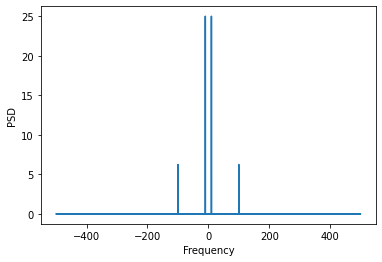

In [21]:
# https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python
import numpy as np
import matplotlib.pyplot as plt

# Generate one-dimensional time series
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # Time vector (s)
v = 10 * np.sin(2*np.pi*10*t) + 5 * np.sin(2*np.pi*100*t)  # Velocity time series (m/s)
# t = np.linspace(0, 1, 1000)
# x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(1000)
x = 10 * np.sin(2*np.pi*10*t) + 5 * np.sin(2*np.pi*100*t)

# Calculate PSD using np.fft
n = len(x)
y = np.fft.fft(x)
psd = np.abs(y)**2 / n**2
freq = np.fft.fftfreq(n, d=1/fs)

# Plot PSD
plt.plot(freq, psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()


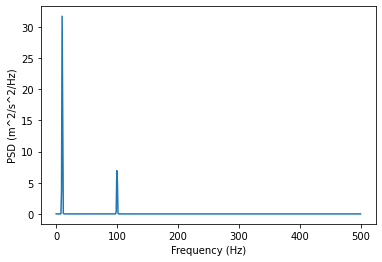

[[0.00000000e+00 1.61764336e-02]
 [9.76562500e-01 7.61874651e-03]
 [1.95312500e+00 5.86350498e-06]
 ...
 [4.98046875e+02 1.74318184e-16]
 [4.99023438e+02 1.74128484e-16]
 [5.00000000e+02 8.70325169e-17]]


In [25]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a sample velocity time series
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # Time vector (s)
v = 10 * np.sin(2*np.pi*10*t) + 5 * np.sin(2*np.pi*100*t)  # Velocity time series (m/s)

# Calculate PSD using Welch's method
f, Pxx = signal.welch(v, fs, nperseg=1024, scaling='density')

# Plot PSD
plt.plot(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (m^2/s^2/Hz)')
plt.show()
# Print f, newline, Pxx
print(np.vstack((f, Pxx)).T)



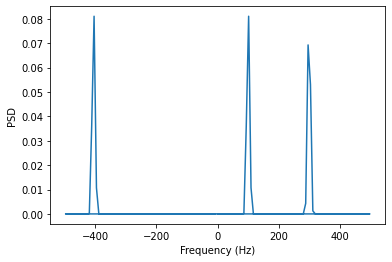

In [26]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
fs = 1000
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*150*t) + np.sin(2*np.pi*300*t)

# Calculate PSD using signal.welch
f, psd = signal.welch(x, fs=fs, nperseg=256)

# Calculate frequencies for the PSD values
freqs = np.fft.fftfreq(len(psd)) * fs

# Plot the PSD versus frequencies
plt.plot(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.show()


In [24]:
import numpy as np
from scipy import signal

# Generate some example data
v = np.random.randn(1000)

# Calculate the power spectral density
fs = 1000 # Sample rate
f, Pxx = signal.welch(v, fs, nperseg=1024, scaling='density')

# Find the index of the maximum value in Pxx
max_idx = np.argmax(Pxx)

# Check if the maximum value is much larger than the rest and not too close to the edges
if Pxx[max_idx] > 10*np.mean(Pxx) and max_idx > 10 and max_idx < len(Pxx)-10:
    # Get the corresponding frequency value
    max_f = f[max_idx]
    print("Maximum power spectral density:", Pxx[max_idx])
    print("Corresponding frequency:", max_f)
else:
    print("No suitable maximum value found.")


No suitable maximum value found.


D:\Anaconda\installer\envs\PyTorch(1.9)\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


Both signal.welch() and np.fft.fft() can be used to calculate the power spectral density (PSD) of a one-dimensional sequence. However, they use different methods to calculate the PSD.

np.fft.fft() computes the fast Fourier transform (FFT) of the input sequence and returns the complex-valued frequency spectrum. To obtain the PSD, you need to compute the squared magnitude of the frequency spectrum and normalize it by the total number of samples:

On the other hand, signal.welch() uses a windowing function to segment the input sequence into overlapping blocks, computes the periodogram of each block using the FFT, and then averages the periodograms to obtain the PSD estimate. The scaling parameter in signal.welch() determines how the PSD is scaled; setting it to 'density' returns the power spectral density per unit frequency. Here's an example usage:

In this case, fs is the sampling frequency (1.0 sample per unit time), and nperseg is the length of each segment used in the FFT. The f variable contains the frequency axis, and psd contains the corresponding PSD values.

Note that the signal.welch() method returns a one-sided PSD estimate by default, since the input sequence is real-valued and the PSD is symmetric around the Nyquist frequency. To obtain the two-sided PSD estimate, you can use the sides='twosided' parameter in signal.welch().

In [13]:
import numpy as np

v = np.random.randn(100000)
fft = np.fft.fft(v)
psd_np = np.abs(fft)**2 / len(v)

from scipy import signal
f, psd_sc = signal.welch(v, fs=2000, nperseg=1005, scaling='density')
print(psd_np.max())
print(psd_sc.max())
print(np.argmax(psd_np))
print(np.argmax(psd_sc))
print(psd_np.shape)
print(psd_sc.shape)

11.546866573602244
0.0011947160843223195
57
164
(100000,)
(503,)


In [2]:
import numpy as np

# Load velocity data
file_path = 'F:\\model_generator\\No_Heating\\center_blockage_0.7\\Re_matrix_u\\2DMatrixReu_00002.txt'
vel_data = np.loadtxt(file_path, dtype=np.float32, delimiter=' ')

# Define the spatial and temporal dimensions
Lx, Ly = vel_data.shape
T = Ly  # Assuming the time axis is the second dimension

# Calculate the power spectrum
psd = np.zeros((Lx, Ly))
for t in range(T):
    vel_fft = np.fft.fft2(vel_data[:, t])
    psd += np.abs(vel_fft)**2 / T
psd /= Lx*Ly*T

# Calculate the power spectral density
dx = 1  # Spatial resolution in x direction
dy = 1  # Spatial resolution in y direction
dt = 1  # Time resolution
psd_density = psd / (dx*dy*dt)


IndexError: index -2 is out of bounds for axis 0 with size 1

In [30]:
import numpy as np
a = np.arange(1, 7).reshape((2, 3))
b = np.arange(7, 13).reshape((2, 3))
c = np.arange(13, 19).reshape((2, 3))
print('a = \n', a)
print('b = \n', b)
print('c = \n', c)
list = [a, b]
list.append(c)
D = np.array(list)
print('D = \n', D.shape)
print('D = \n', D)

a = 
 [[1 2 3]
 [4 5 6]]
b = 
 [[ 7  8  9]
 [10 11 12]]
c = 
 [[13 14 15]
 [16 17 18]]
D = 
 (3, 2, 3)
D = 
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]


对比python里各种PSD计算方法

In [ ]:
# 判断scipy与numpy的fit方法是否一致

In [58]:
import numpy as np
import scipy
from scipy import signal

# Generate random data
fs = 4000
t = np.arange(0, 3, 1/fs)
y = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*140*t) + np.cos(2*np.pi*300*t) * t ** 2

p_np = np.fft.fft(y)
p_sc = scipy.fft.fft(y)
print(p_np)
print(p_sc)

[-4.49311885+0.j         -4.49311883-0.02161778j -4.49311875-0.04323572j
 ... -4.49311863+0.06485398j -4.49311875+0.04323572j
 -4.49311883+0.02161778j]
[-4.49311885-0.j         -4.49311883-0.02161778j -4.49311875-0.04323572j
 ... -4.49311863+0.06485398j -4.49311875+0.04323572j
 -4.49311883+0.02161778j]


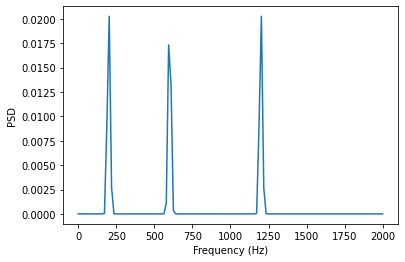

In [81]:
import numpy as np
from scipy.signal import periodogram, welch
import matplotlib.pyplot as plt

# Generate random data
fs = 4000
t = np.arange(0, 3, 1/fs)
y = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*140*t) + np.cos(2*np.pi*300*t) * t ** 2

# Calculate PSD using signal.welch
f, psd = welch(x, fs=fs, nperseg=256, scaling='density')
# f, psd = periodogram(y, fs, scaling='density')

# Plot the PSD versus frequencies
plt.plot(f, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.show()

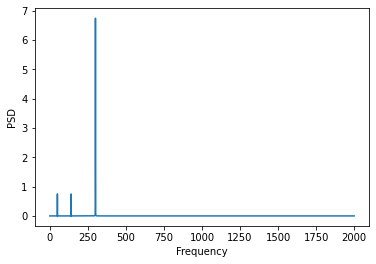

In [77]:
# Calculate PSD using np.fft
n = len(y)
y_FFT = np.fft.fft(y)
# psd = np.abs(y_FFT)**2 / (n*fs)
freq = np.fft.fftfreq(n, d=1/fs)
# freq = np.fft.fftshift(freq)
# print(freq)
# Find the indices corresponding to positive frequencies
positive_freq_indices = np.where(freq >= 0)
# Extract the PSD for positive frequencies
psd = np.abs(y_FFT[positive_freq_indices])**2 / (n * fs)
# Plot PSD
plt.plot(freq[positive_freq_indices], psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

In [63]:
freqs = np.fft.fftfreq(100, 0.0001)  # freq的中心不是零
freqs

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900., -5000., -4900., -4800., -4700., -4600., -4500.,
       -4400., -4300., -4200., -4100., -4000., -3900., -3800., -3700.,
       -3600., -3500., -3400., -3300., -3200., -3100., -3000., -2900.,
       -2800., -2700., -2600., -2500., -2400., -2300., -2200., -2100.,
       -2000., -1900., -1800., -1700., -1600., -1500., -1400., -1300.,
       -1200., -1100., -1000.,  -900.,  -800.,  -700.,  -600.,  -500.,
        -400.,  -300.,  -200.,  -100.])

In [79]:
# Generate random data
fs = 4000
t = np.arange(0, 3, 1/fs)
y = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*140*t) + np.cos(2*np.pi*300*t) * t ** 2

file_Gen = np.vstack((t, y)).T
out_2D_PSD = 'D:\\AutoSyncDu\\BaiduSyncdisk\\Graduation dissertation\\论文\\POF PIV\\绘图\\PSD分析'
np.savetxt(fname=out_2D_PSD + '/' + 'two-dim-PSD'  + '.txt', X=file_Gen, fmt='%.32f')

In [82]:
# 随机生成[10,24,30]的三维数组
import numpy as np
a = np.random.randn(10, 24, 30)
print(a.shape)
b = a[:, 5, 6]
print(b.shape)

(10, 24, 30)
(10,)


In [90]:
import numpy as np
a = np.random.randn(10, 14) * 100
a = a.astype(np.int_)
# 找到二维numpy数组a最大值对应的索引
print(a)
(row_index, column_index) = np.unravel_index(np.argmax(a), a.shape)
print(row_index, column_index)

[[ -47  -94   25  213 -322   67  -32   34   92  -79  -50  -39  -31  -43]
 [  56  -30   26  -88 -120  -65  -21  112 -106 -109   41    2   98  111]
 [  49  -20   14  -51   -4 -140   26   50 -118 -172  163 -114   54   63]
 [  12  -14   93   76  116  177   80  240  -91  125  -52  -44  -26  -78]
 [-124   35   54   58 -113  -92  -30  -97 -136  -55  -60   23    0  235]
 [-163  -74  -80  -78 -126  135  -58   59  -14  104 -115  -10  -68   17]
 [ -38 -101  138   45 -153    2   36   56    0 -123   58 -136  -69  -39]
 [  -2  -96   49 -105  -65  -46   97  134   28  -77   13   12  -22 -117]
 [ 108  -24  149  -31  -19  -54    0   -8  -15  -73   12  -38  -79   55]
 [ 201  -10 -101  -25  117    8   45  -34  -35 -185   24   78 -139 -124]]
3 7


In [101]:
if False:
    print('not run')
if True:
    print('run')


run
